In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [39]:
dat=pd.read_csv('/content/molar_data.csv')

In [40]:
#loading useful libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
#Import packages
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

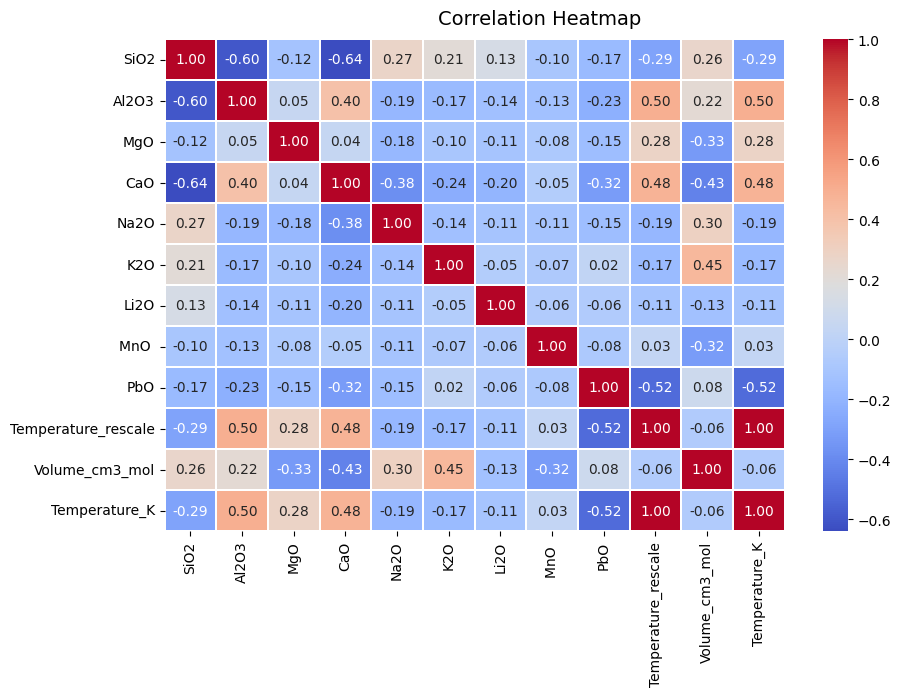

In [ ]:
#finding correlations between diffierent variables
f, ax = plt.subplots(figsize=(10, 6))
corr = dat.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

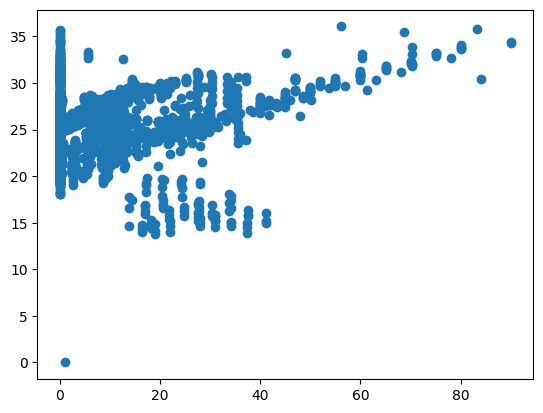

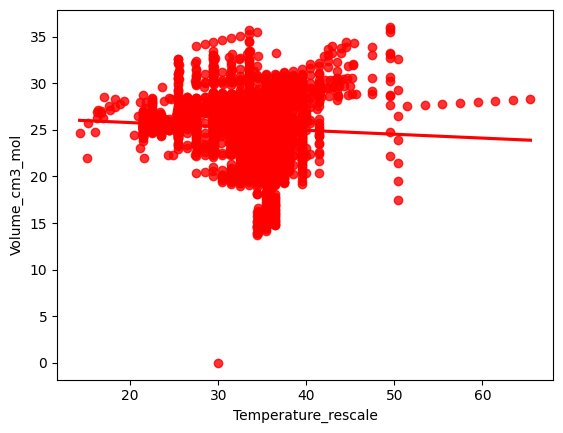

In [ ]:
#scatter plot showing relationship between each indepenedent variable with dependent variable
plt.scatter(dat["Al2O3"],dat["Volume_cm3_mol"])
plt.show()
#regrssion plot between temperature and volume
sns.regplot(x=dat["Temperature_rescale"],y=dat["Volume_cm3_mol"],ci=None,color ='red');

In [50]:
x=dat.iloc[:,0:10]
y=dat.iloc[:,10]
x
#x containes independent data set which are 9 oxides and temperature
#y is columns of molar volume, on which prediction is to be made

,SiO2,Al2O3,MgO,CaO,Na2O,K2O,Li2O,MnO,PbO,Temperature_rescale
0,50.500000,9.600000,0.0,0.000000,39.9,0.0,0.0,0.0,0.0,27.460000
1,50.500000,9.600000,0.0,0.000000,39.9,0.0,0.0,0.0,0.0,29.420000
2,50.500000,9.600000,0.0,0.000000,39.9,0.0,0.0,0.0,0.0,31.480000
3,53.000000,0.000000,0.0,0.000000,42.0,0.0,0.0,5.0,0.0,31.460000
4,50.600000,0.000000,0.0,0.000000,40.2,0.0,0.0,9.2,0.0,31.480000
...,...,...,...,...,...,...,...,...,...,...
2688,5.960616,33.369098,0.0,60.670286,0.0,0.0,0.0,0.0,0.0,35.425162
2689,3.590894,34.209974,0.0,62.199132,0.0,0.0,0.0,0.0,0.0,38.449807
2690,5.960616,33.369098,0.0,60.670286,0.0,0.0,0.0,0.0,0.0,36.443586
2691,5.960616,33.369098,0.0,60.670286,0.0,0.0,0.0,0.0,0.0,37.461818


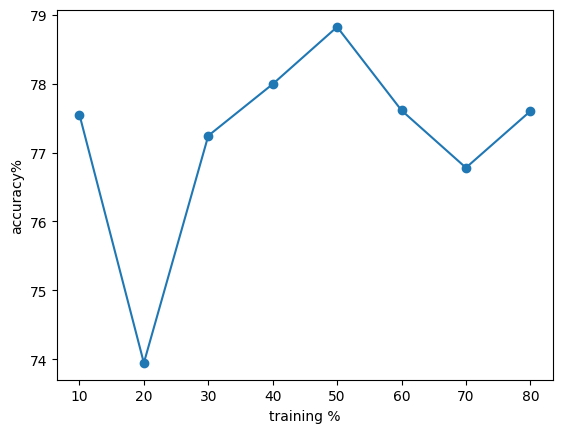

In [ ]:
#This code snippet contains analysis of accuracy achieved using linear regression with different percentage of training-test split
t=[]
for i in range (1,9):
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(i*10)/100,random_state=0)
 reg=LinearRegression()
 reg.fit(x_train,y_train)
 y_pred=reg.predict(x_test)
 acc=r2_score(y_test,y_pred)*100
 t.append(acc)
t
plt.scatter(range(10,90,10),t)
plt.plot(range(10,90,10),t)
plt.xlabel("training %")
plt.ylabel("accuracy%")
plt.show()
#model.intercept_
#
#print("intercept is",model.intercept_)
#print("slope is",model.coef_)
#y_pred2=model.intercept_+np.sum(model.coef_*x_train,axis=1)
#y_pred2

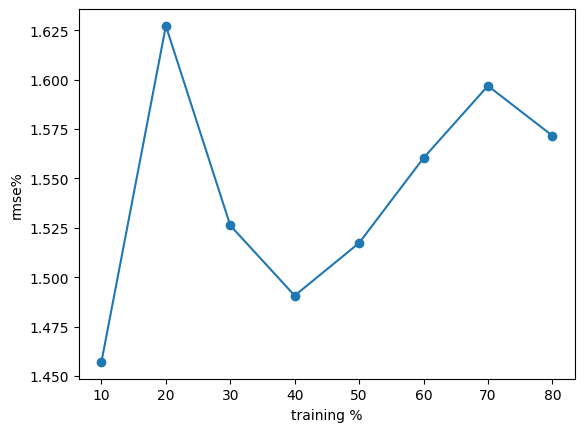

In [ ]:
#plot of different rmse values at different train-test split
t=[]
for i in range (1,9):
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(i*10)/100,random_state=0)
 reg=LinearRegression()
 reg.fit(x_train,y_train)
 y_pred=reg.predict(x_test)
 mse=mean_squared_error (y_pred,y_test)
 rmse=np.sqrt(mse)
 t.append(rmse)
t
plt.scatter(range(10,90,10),t)
plt.plot(range(10,90,10),t)
plt.xlabel("training %")
plt.ylabel("rmse%")
plt.show()

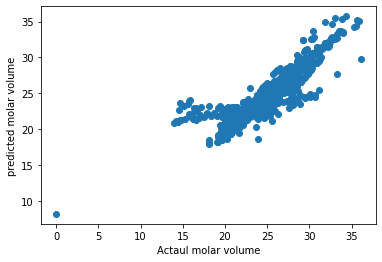

array([[26.89465508],
       [24.73217332],
       [22.09383446],
       ...,
       [22.49482894],
       [28.17734721],
       [26.42741267]])

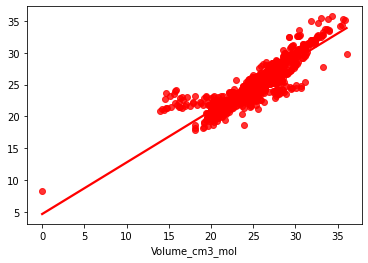

In [ ]:
# as max ccuracy at 50% training,so let us work more with this trainig set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(5*10)/100,random_state=0)
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
plt.scatter(y_test,y_pred)
plt.xlabel("Actaul molar volume")
plt.ylabel("predicted molar volume")
plt.show()
#regression plot showing accuracy of model
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

maximum accuracy achieved is 80.89246582752912


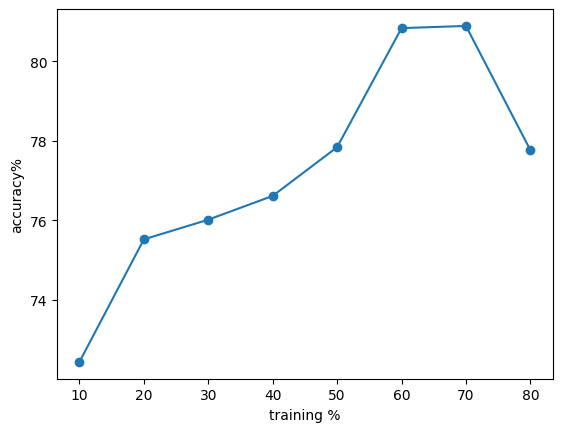

In [ ]:
# working with SVM technique
t=[]
for i in range (1,9):
 x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=(i*10)/100,random_state=0)
 reg=SVR(kernel='rbf')
 reg.fit(x_train,y_train)
 y_pred=reg.predict(x_test)
 acc=r2_score(y_test,y_pred)*100
 t.append(acc)
t
print("maximum accuracy achieved is",np.max(t))
plt.scatter(range(10,90,10),t)
plt.plot(range(10,90,10),t)
plt.xlabel("training %")
plt.ylabel("accuracy%")
plt.show()
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(80)/100,random_state=0)
#reg.fit(x_train,y_train)
#y_pred=reg.predict(x_test) 
#plt.plot(x_test["Al2O3"],y_test,label="test value")
#plt.plot(y_pred,x_test["Al2O3"],label="predicted value")
#plt.show()
#print("Accurcay by svm",r2_score(y_pred,y_test))
#y_test.shape[0]
#x_test["Al2O3"]

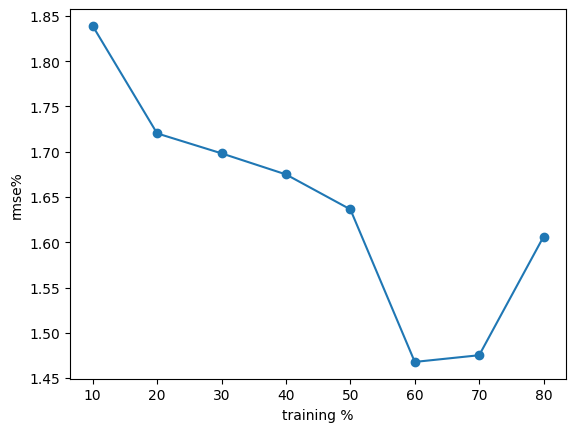

In [ ]:
#rmse values at different train-test split percentage
t=[]
for i in range (1,9):
 x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=(i*10)/100,random_state=0)
 reg=SVR(kernel='rbf')
 reg.fit(x_train,y_train)
 y_pred=reg.predict(x_test)
 rmse=np.sqrt(mean_squared_error(y_test,y_pred))
 t.append(rmse)
plt.scatter(range(10,90,10),t)
plt.plot(range(10,90,10),t)
plt.xlabel("training %")
plt.ylabel("rmse%")
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(40)/100,random_state=0)
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(x_train, y_train)
gaussian_process.kernel_

/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


303**2 * RBF(length_scale=0.0104)

/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.9/dist-packages/sklearn/

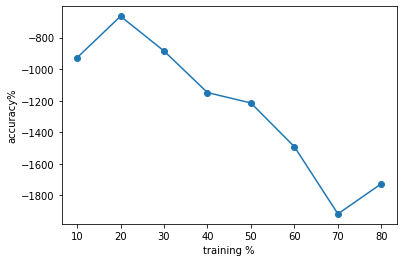

In [ ]:
t=[]
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
for i in range (1,9):
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(i*10)/100,random_state=0)
 #sc=StandardScaler()
 #x_train=sc.fit_transform(x_train)
 gauss=GaussianProcessRegressor(kernel=kernel)
 gauss.fit(x_train,y_train)
 y_pred=gauss.predict(x_test)
 acc=r2_score(y_test,y_pred)*100
 t.append(acc)
t
plt.scatter(range(10,90,10),t)
plt.plot(range(10,90,10),t)
plt.xlabel("training %")
plt.ylabel("accuracy%")
plt.show()
#model.intercept_
#
#print("intercept is",model.intercept_)
#print("slope is",model.coef_)
#y_pred2=model.intercept_+np.sum(model.coef_*x_train,axis=1)
#y_pred2

/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.9/dist-packages/sklearn/

Average of rmse of ecah training set 12.394777164333034


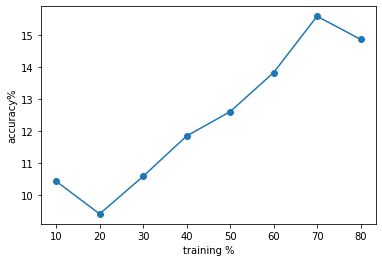

In [ ]:
t=[]
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
for i in range (1,9):
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(i*10)/100,random_state=0)
 #sc=StandardScaler()
 #x_train=sc.fit_transform(x_train)
 gauss=GaussianProcessRegressor(kernel=kernel)
 gauss.fit(x_train,y_train)
 y_pred=gauss.predict(x_test)
 mse=mean_squared_error (y_pred,y_test)
 rmse=np.sqrt(mse)
 t.append(rmse)
print("Average of rmse of ecah training set",np.mean(t))
plt.scatter(range(10,90,10),t)
plt.plot(range(10,90,10),t)
plt.xlabel("training %")
plt.ylabel("accuracy%")
plt.show()


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(4*10)/100,random_state=0)
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gauss=GaussianProcessRegressor(kernel=kernel)
gauss.fit(x_train,y_train)
y_pred=gauss.predict(x_test)
y_pred

/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


array([5.66155419e+00, 4.11055794e+00, 2.16133344e-10, ...,
       4.32727998e-04, 6.22179195e-21, 1.29653266e+00])

Epoch 1/50
9/9 [==============================] - 1s 3ms/step - loss: 650.4791
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 632.8716
Epoch 3/50
9/9 [==============================] - 0s 2ms/step - loss: 616.4412
Epoch 4/50
9/9 [==============================] - 0s 2ms/step - loss: 599.6094
Epoch 5/50
9/9 [==============================] - 0s 3ms/step - loss: 582.9292
Epoch 6/50
9/9 [==============================] - 0s 2ms/step - loss: 564.3704
Epoch 7/50
9/9 [==============================] - 0s 2ms/step - loss: 543.7986
Epoch 8/50
9/9 [==============================] - 0s 2ms/step - loss: 520.5082
Epoch 9/50
9/9 [==============================] - 0s 2ms/step - loss: 495.5957
Epoch 10/50
9/9 [==============================] - 0s 3ms/step - loss: 467.3690
Epoch 11/50
9/9 [==============================] - 0s 2ms/step - loss: 437.3322
Epoch 12/50
9/9 [==============================] - 0s 2ms/step - loss: 405.8771
Epoch 13/50
9/9 [==============================] 

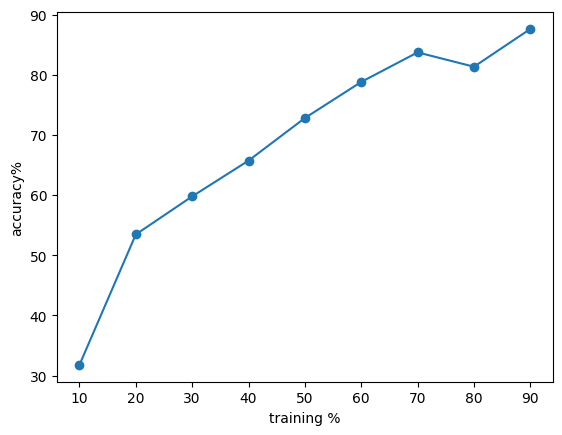

In [ ]:
# using neural network
t=[]
for i in range (1,10):
 x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=i/10,random_state=0)
 sc = StandardScaler()
 x_train = sc.fit_transform(x_train)
 x_test = sc.transform(x_test)
 model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)])
 model.compile(loss='mean_squared_error', optimizer='adam')
 model.fit(x_train, y_train, epochs=50,batch_size=32)
 predictions = model.predict(x_test)
 acc=r2_score(predictions,y_test)
 acc
 t.append(acc*100)
plt.scatter(range(10,100,10),t)
plt.plot(range(10,100,10),t)
plt.xlabel("training %")
plt.ylabel("accuracy%")
plt.show()

Epoch 1/50
9/9 [==============================] - 1s 2ms/step - loss: 645.0278
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 628.2804
Epoch 3/50
9/9 [==============================] - 0s 1ms/step - loss: 612.0439
Epoch 4/50
9/9 [==============================] - 0s 1ms/step - loss: 595.0302
Epoch 5/50
9/9 [==============================] - 0s 1ms/step - loss: 576.5839
Epoch 6/50
9/9 [==============================] - 0s 1ms/step - loss: 555.5045
Epoch 7/50
9/9 [==============================] - 0s 1ms/step - loss: 531.5919
Epoch 8/50
9/9 [==============================] - 0s 1ms/step - loss: 504.6082
Epoch 9/50
9/9 [==============================] - 0s 1ms/step - loss: 475.1212
Epoch 10/50
9/9 [==============================] - 0s 2ms/step - loss: 442.2315
Epoch 11/50
9/9 [==============================] - 0s 2ms/step - loss: 406.9381
Epoch 12/50
9/9 [==============================] - 0s 1ms/step - loss: 369.7234
Epoch 13/50
9/9 [==============================] 

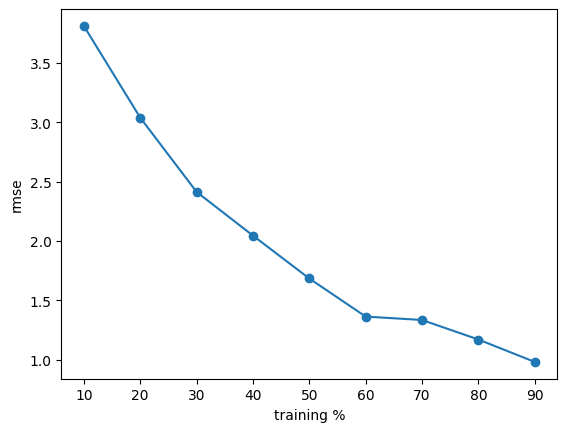

In [ ]:
# using neural network
t=[]
for i in range (1,10):
 x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=i/10,random_state=0)
 sc = StandardScaler()
 x_train = sc.fit_transform(x_train)
 x_test = sc.transform(x_test)
 model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)])
 model.compile(loss='mean_squared_error', optimizer='adam')
 model.fit(x_train, y_train, epochs=50,batch_size=32)
 predictions = model.predict(x_test)
 rmse=np.sqrt(mean_squared_error(predictions,y_test))
 rmse
 t.append(rmse)
plt.scatter(range(10,100,10),t)
plt.plot(range(10,100,10),t)
plt.xlabel("training %")
plt.ylabel("rmse")
plt.show()

In [ ]:
#LR with ANN
# Define the model
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)])
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=50,batch_size=32)
predictions = model.predict(x_test)
acc=r2_score(predictions,y_test)
acc


Epoch 1/50
59/59 [==============================] - 1s 2ms/step - loss: 640.7759
Epoch 2/50
59/59 [==============================] - 0s 2ms/step - loss: 529.2310
Epoch 3/50
59/59 [==============================] - 0s 2ms/step - loss: 308.8264
Epoch 4/50
59/59 [==============================] - 0s 2ms/step - loss: 96.0918
Epoch 5/50
59/59 [==============================] - 0s 2ms/step - loss: 34.0406
Epoch 6/50
59/59 [==============================] - 0s 2ms/step - loss: 22.8878
Epoch 7/50
59/59 [==============================] - 0s 2ms/step - loss: 17.9927
Epoch 8/50
59/59 [==============================] - 0s 2ms/step - loss: 15.4205
Epoch 9/50
59/59 [==============================] - 0s 2ms/step - loss: 13.8511
Epoch 10/50
59/59 [==============================] - 0s 2ms/step - loss: 12.5549
Epoch 11/50
59/59 [==============================] - 0s 2ms/step - loss: 11.5176
Epoch 12/50
59/59 [==============================] - 0s 2ms/step - loss: 10.6310
Epoch 13/50
59/59 [===============

0.8393159123380382

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(x)

# Fit a linear regression model to the transformed data
model = LinearRegression()
model.fit(X_poly, y)

# Predict the response for the input data
y_pred = model.predict(X_poly)
print(y_pred.shape,X_poly.shape,y.shape)
# Calculate the R-squared score
r2 = r2_score(y, y_pred)
# Print the coefficients and the R-squared score
print('Coefficients: ', model.coef_)
print('R-squared score: ', r2)

(2693,) (2693, 285) (2693,)
(2693, 285)
Coefficients:  [ 1.63737229e+05  1.73577500e+05  1.69293585e+05  1.57859989e+05
  9.88541685e+05 -1.20858900e+07 -2.47094276e+06  2.48513999e+06
  4.81503639e+05  2.52082263e+04 -1.52274479e+03 -3.25027878e+03
 -3.15518977e+03 -2.94680381e+03 -1.95774496e+04  2.41829590e+05
 -6.03333997e+06 -4.89933756e+04  5.93616461e+06 -5.17667531e+02
 -1.71704016e+03 -3.35515826e+03 -3.15874048e+03 -1.97798701e+04
  2.41370819e+05 -2.20508864e+05 -4.91968971e+04  9.99660138e+05
 -5.01951431e+02 -1.64513299e+03 -3.04913065e+03 -1.97016437e+04
  2.41242562e+05 -2.00299585e+06 -4.93098806e+04  3.63328794e+06
 -5.20555504e+02 -1.41276936e+03 -1.94731169e+04  2.42090809e+05
  9.15427256e+05 -4.88913541e+04 -2.20562858e+06 -4.88868923e+02
 -1.80183006e+04  2.25101532e+05 -1.13471379e+06  2.42660113e+06
 -2.09718282e+06 -4.60162048e+02  2.44639302e+05  3.24286989e+06
  3.39221294e+06 -7.26314462e+06 -3.74623267e+02 -8.08427749e+05
 -4.06596300e+06 -3.04203869e+06  2

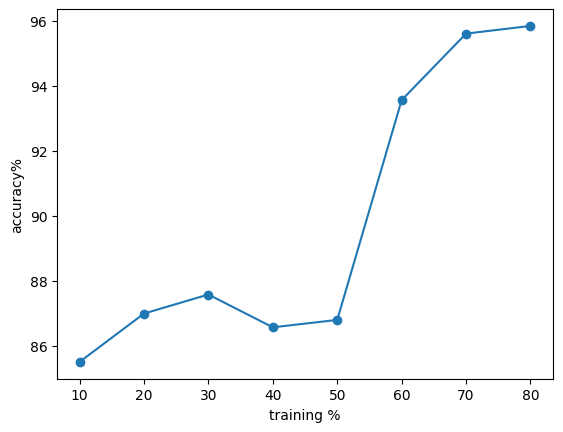

In [ ]:
#code using random forest regrresor
t=[]
for i in range (1,9):
 x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=(i*10)/100,random_state=0)
 reg= RandomForestRegressor(n_estimators=50, random_state=0)
 reg.fit(x_train,y_train)
 y_pred=reg.predict(x_test)
 acc=r2_score(y_pred,y_test)*100
 t.append(acc)
plt.scatter(range(10,90,10),t)
plt.plot(range(10,90,10),t)
plt.xlabel("training %")
plt.ylabel("accuracy%")
plt.show()

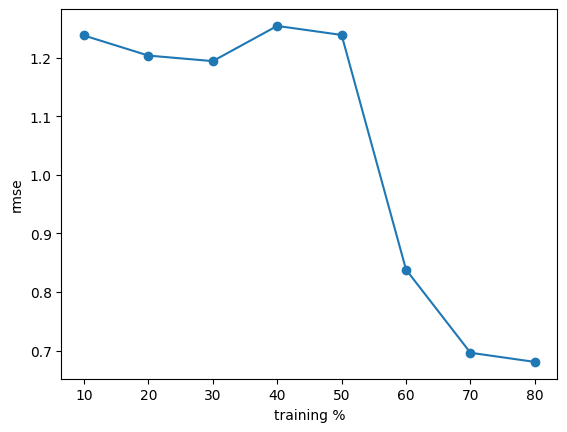

In [ ]:
#code using random forest regrresor for rmse
t=[]
for i in range (1,9):
 x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=(i*10)/100,random_state=0)
 reg= RandomForestRegressor(n_estimators=50, random_state=0)
 reg.fit(x_train,y_train)
 y_pred=reg.predict(x_test)
 rmse=np.sqrt(mean_squared_error(y_pred,y_test))
 t.append(rmse)
plt.scatter(range(10,90,10),t)
plt.plot(range(10,90,10),t)
plt.xlabel("training %")
plt.ylabel("rmse")
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)

# Split the dataset into train and test sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

# Train SVM classifier and calculate its accuracy
svm_clf = SVR(kernel='rbf', C=1)
svm_clf.fit(X_train, y_train)
svm_accuracy = svm_clf.score(X_test, y_test)*100

# Train Linear Regression model and calculate its accuracy
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_accuracy = linear_reg.score(X_test, y_test)*100

# Train Neural Network classifier and calculate its accuracy
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)])
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=50,batch_size=32)
predictions = model.predict(x_test)
acc=r2_score(predictions,y_test)*100

#accuracy with polynomial regression
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(x)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
acc1=r2_score(y,y_pred)*100

#accuracy with random forest regressor
reg= RandomForestRegressor(n_estimators=50, random_state=0)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
acc2=r2_score(y_pred,y_test)*100

# Plot the accuracy scores
labels = ['SVM', 'Linear Regression', 'Neural Network','polynomial Regression','Random Forest Regressor']
accuracy_scores = [svm_accuracy, linear_reg_accuracy, acc,acc1,acc2]
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy')
plt.ylim(0, 100)
plt.show()

NameError: ignored

Epoch 1/50
59/59 [==============================] - 1s 2ms/step - loss: 884.2693
Epoch 2/50
59/59 [==============================] - 0s 2ms/step - loss: 29.9955
Epoch 3/50
59/59 [==============================] - 0s 2ms/step - loss: 8.2069
Epoch 4/50
59/59 [==============================] - 0s 2ms/step - loss: 5.9054
Epoch 5/50
59/59 [==============================] - 0s 2ms/step - loss: 4.8353
Epoch 6/50
59/59 [==============================] - 0s 2ms/step - loss: 4.1974
Epoch 7/50
59/59 [==============================] - 0s 2ms/step - loss: 3.7238
Epoch 8/50
59/59 [==============================] - 0s 2ms/step - loss: 3.3519
Epoch 9/50
59/59 [==============================] - 0s 2ms/step - loss: 3.0446
Epoch 10/50
59/59 [==============================] - 0s 2ms/step - loss: 2.7537
Epoch 11/50
59/59 [==============================] - 0s 2ms/step - loss: 2.5184
Epoch 12/50
59/59 [==============================] - 0s 2ms/step - loss: 2.3612
Epoch 13/50
59/59 [===========================

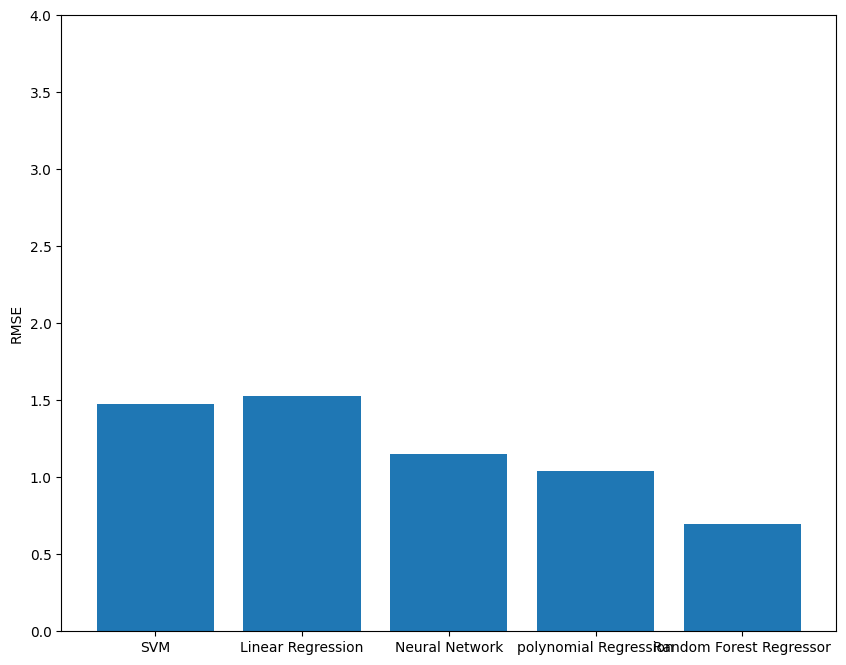

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)

# Split the dataset into train and test sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

# Train SVM classifier and calculate its accuracy
svm_clf = SVR(kernel='rbf', C=1)
svm_clf.fit(X_train, y_train)
y_pred=svm_clf.predict(X_test)
rmse1=np.sqrt(mean_squared_error(y_test,y_pred))

# Train Linear Regression model and calculate its accuracy
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred=linear_reg.predict(X_test)
rmse2=np.sqrt(mean_squared_error(y_test,y_pred))

# Train Neural Network classifier and calculate its accuracy
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)])
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50,batch_size=32)
predictions = model.predict(X_test)
rmse3=np.sqrt(mean_squared_error(y_test,predictions))


#accuracy with polynomial regression
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(x)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
rmse4=np.sqrt(mean_squared_error(y,y_pred))


#accuracy with random forest regressor
reg= RandomForestRegressor(n_estimators=50, random_state=0)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
rmse5=np.sqrt(mean_squared_error(y_test,y_pred))


# Plot the accuracy scores
labels = ['SVM', 'Linear Regression', 'Neural Network','polynomial Regression','Random Forest Regressor']
accuracy_scores = [rmse1,rmse2,rmse3,rmse4,rmse5]
plt.bar(labels, accuracy_scores)
plt.ylabel('RMSE')
plt.ylim(0, 4)
plt.show()

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=(7*10)/100,random_state=0)
reg= RandomForestRegressor(n_estimators=50, random_state=0)
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
acc=r2_score(y_pred,y_test)
oxide=["SiO2"	,"Al2O3",	"MgO"	,"CaO","Na2O","K2O","Li2O"	,"MnO",	"PbO"]
new_input = np.random.rand(1, 10)
pred_vol=reg.predict(new_input) 
print("Predicted volume is",pred_vol[0])

Predicted volume is 25.651206079399998


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
